## Search and read CMIP6 data by using xarray

In [21]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy as cy
import cartopy.crs as ccrs
import functions
%matplotlib inline

### open CMIP6 online catalog
### data from CMIP6 of DMS for fully coupled model simulations (ocean + atmosphere).
### 

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id=['dmso'])
#cat = col.search(variable_id=['emidms'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r2i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181031
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r3i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181107
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r4i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190328
6,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp370,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021
7,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021


## Load DMS data from CNRM_ESM2-1, historical experiment if they are in the pangeo

In [6]:
cat = col.search(variable_id=['dmso'],source_id=['CNRM-ESM2-1'],
 activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'], 
                  member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [7]:
### data from CMIP6 of DMS for OMIP model simulations, where the atmosphere is prescribed. These data are in a bucket and not in pangeo
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [8]:
list(dset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [9]:
dset = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
dset = dset.isel(lev=0).squeeze()
dset

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

### get the meta data corresponding to the DMSO

In [10]:
print(dset['dmso'])

<xarray.DataArray 'dmso' (time: 1980, y: 294, x: 362)>
dask.array<getitem, shape=(1980, 294, 362), dtype=float32, chunksize=(4, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev        float64 0.5058
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         Mole Concentration of Dimethyl Sulphide in sea water
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Mole Concentration of Dimethyl Sulphide in sea water
    online_operation:    average
    standard_name:       mole_concentration_of_dimethyl_sulfide_in_sea_water
    u

In [11]:
dset.time.values

array([cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2014, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)

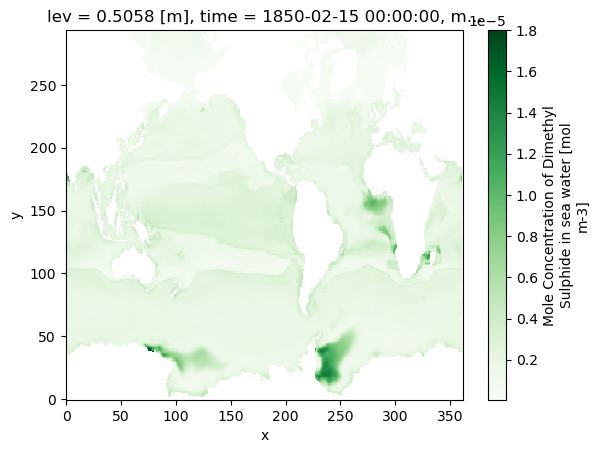

In [54]:
dset['dmso'].sel(time=cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, has_year_zero=False)).plot(cmap = 'Greens')
#                 method='nearest')

## choosing the area of interest. Here we are interested in arctic and speciffically Greenland
### There are two ways of doing it:
- where function
- slice function

### 1- selecting the area using where function and plotting it

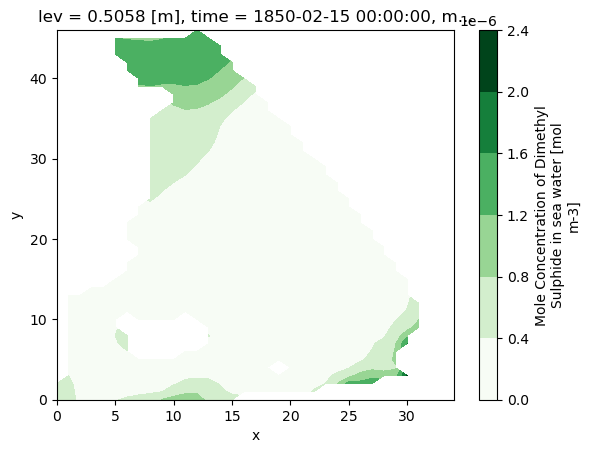

In [55]:
dset_GLarea = dset.where((dset.lon>=-30) & (dset.lon<=10) & (dset.lat <= 85)  & (dset.lat >= 60),
                         drop=True).sel(
                        time=cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, has_year_zero=False))
#dset_GLarea['dmso'].plot.contourf(cmap='YlOrRd')
dset_GLarea['dmso'].plot.contourf(cmap='Greens')

### 2- selecting the area using slice function

In [45]:
dset_GLarea = dset.sel(lat=slice(54.5,71.5), lon=slice(-2.5,42.5))
dset_GLarea

KeyError: "no index found for coordinate 'lat'"

#### Note: 
##### looking at the data attribute, one can find that one cannot a 'star', sign for the lon and lat. Therefore one should choose another variable to slice with that is assigned with "star",. In the dmso data, the time is assigned/labeled with '*', so I'll choose it to make the slice.

In [53]:
dset_GLarea = dset.sel(time=slice('2011-01-01','2014-12-31'))
                       
dset_GLarea

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 48, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 2011-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(48, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

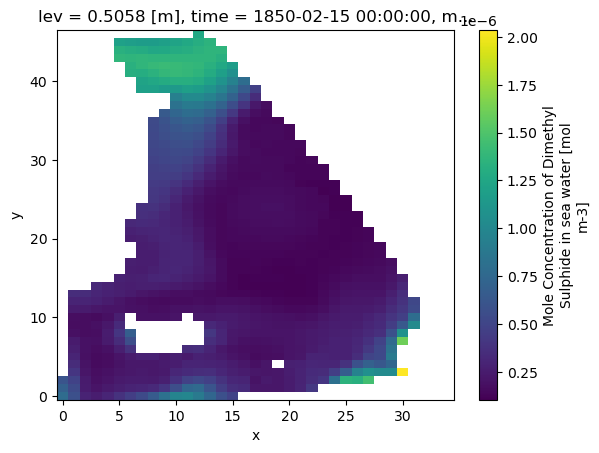

In [57]:
dset_GLarea['dmso'].plot()

### open CMIP6 online catalog

In [3]:
## some of the variables, e.g. DMS emission (emidms) and dmsos, are not in pangeo, so we put them in a bucket
## dmsos is DMS at surface 
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# list avilable data in the bucket
s3.ls('escience2022/Ada/monthly')
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dmsos' in file ]
#files = [file for file in s3.ls(dir) if 'emidms' in file ]
files

['escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_esm-hist_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_170001-194912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_195001-200912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_186001-186912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_187001-187912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_188001-188912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_189001-189912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_190001-190912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_191001-191912.nc',
 'escience2022/Ada/mo

## Load DMS data from NorESM2-LM, historical experiment if they are in the pangeo

In [7]:
cat = col.search(source_id=['CNRM_ESM2-1'], activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'], 
                 variable_id=['dmso'], member_id=['r1i1p1f1']
                )
cat.df

/srv/conda/envs/notebook/lib/python3.9/site-packages/intake_esm/search.py:106: UserWarning: Query returned zero results.
  warn(message)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version


## Load DMS data from NorESM2-LM, historical experiment if they are in the bucket


In [8]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Ada/monthly/dmsos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
#dmsos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_200001-200912.nc'
#dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc'
#dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc'

file = s3.open(s3file)
ds = xr.open_dataset(file)
ds.dmsos

<xarray.DataArray 'dmsos' (time: 1200, j: 330, i: 360)>
[142560000 values with dtype=float32]
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 ...
    longitude  (j, i) float32 ...
Attributes:
    standard_name:   mole_concentration_of_dimethyl_sulfide_in_sea_water
    long_name:       Surface Mole Concentration of Dimethyl Sulphide in Sea W...
    comment:         Mole concentration of dimethyl sulphide in water in the ...
    units:           mol m-3
    original_name:   mo: (variable_name: DMS_SURF)
    original_units:  nmol L-1
    history:         2020-02-28T17:10:38Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello

In [5]:
ds.dmso.isel(time=22).plot(robust=True)

NameError: name 'ds' is not defined

In [10]:

da_plt = ds['dmsos'].isel(time=22)
da_plt

<xarray.DataArray 'dmsos' (j: 330, i: 360)>
[118800 values with dtype=float32]
Coordinates:
    time       object 1851-11-16 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 ...
    longitude  (j, i) float32 ...
Attributes:
    standard_name:   mole_concentration_of_dimethyl_sulfide_in_sea_water
    long_name:       Surface Mole Concentration of Dimethyl Sulphide in Sea W...
    comment:         Mole concentration of dimethyl sulphide in water in the ...
    units:           mol m-3
    original_name:   mo: (variable_name: DMS_SURF)
    original_units:  nmol L-1
    history:         2020-02-28T17:10:38Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello

In [35]:
#from matplotlib.colors import LogNorm

In [12]:
## converting the index i to fit with the coordinate system 
#da_plt['j'] = da_plt['j']*(180/len(da_plt['j']))
#da_plt['j']

<xarray.DataArray 'j' (j: 385)>
array([  0.467532,   0.935065,   1.402597, ..., 179.064935, 179.532468,
       180.      ])
Coordinates:
    time     object 2000-02-15 00:00:00
  * j        (j) float64 0.4675 0.9351 1.403 1.87 ... 178.6 179.1 179.5 180.0

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


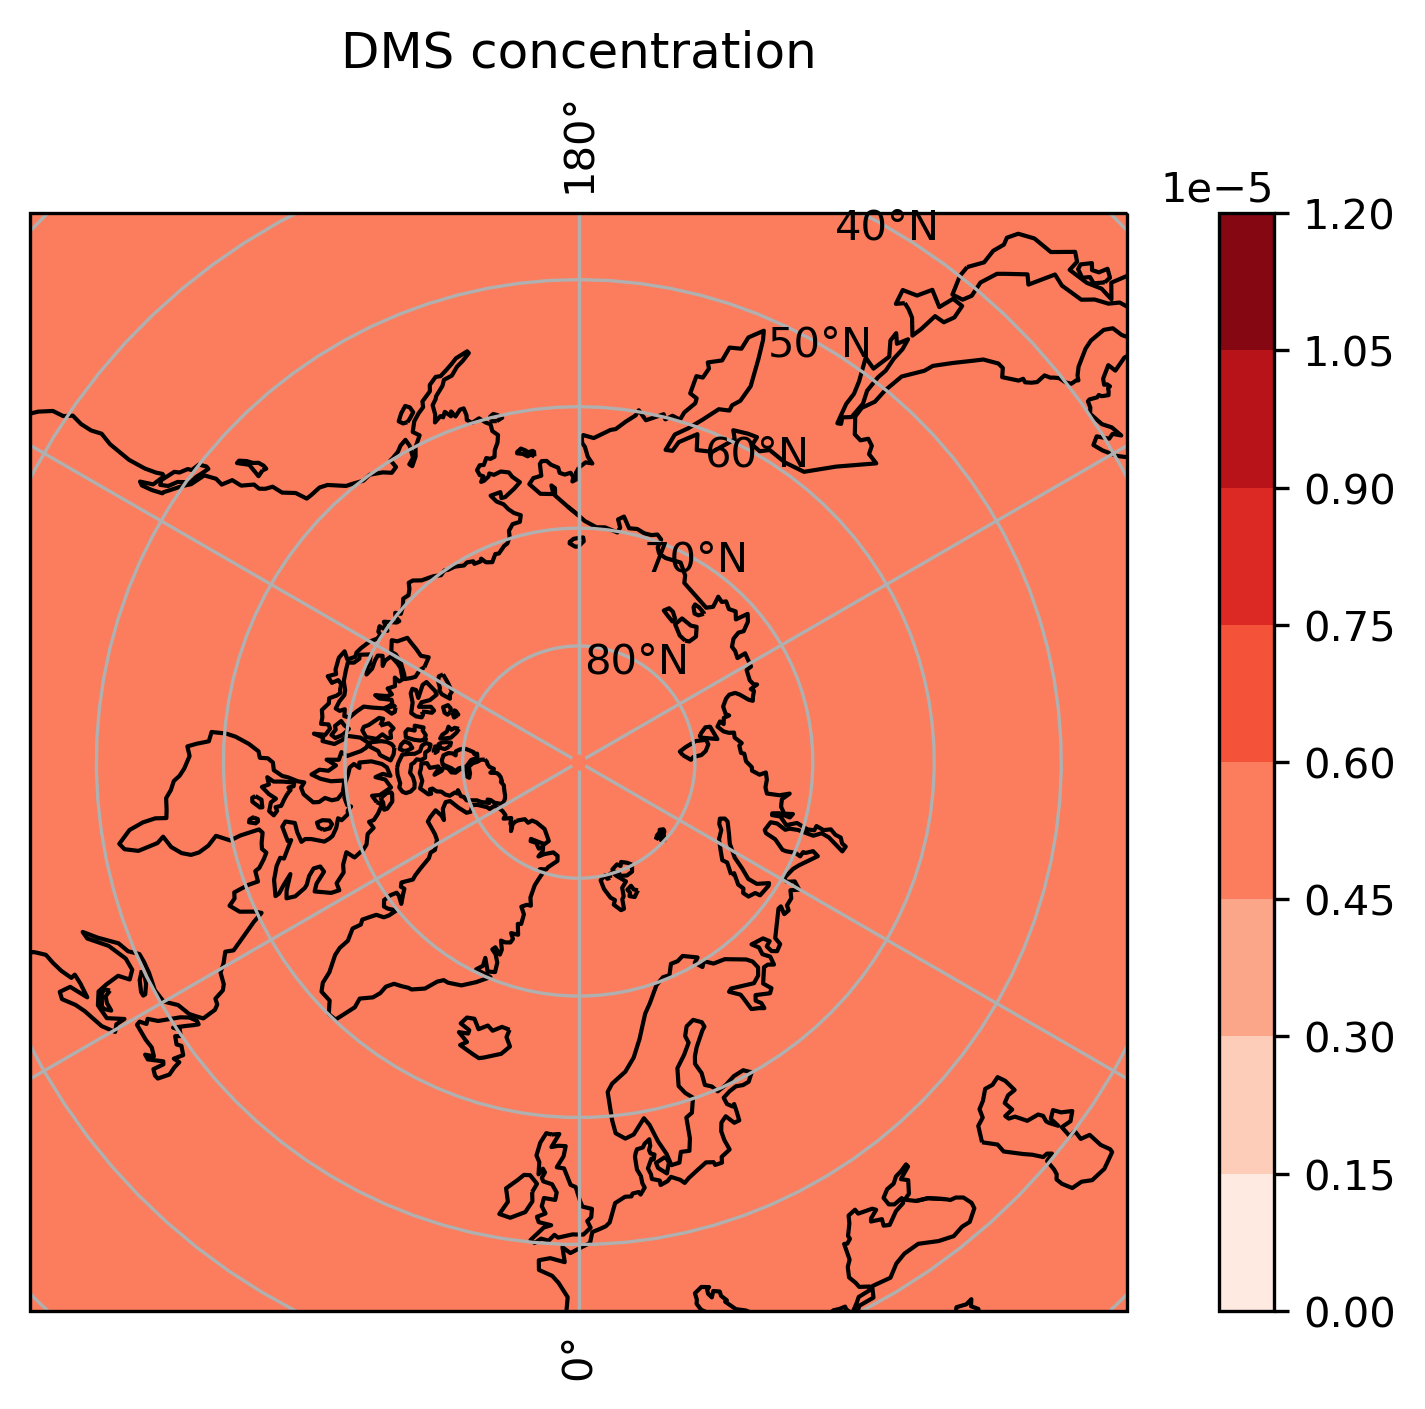

In [11]:
#f,ax = plt.subplots(1,1,dpi=300,subplot_kw={'projection':ccrs.NorthPolarStereo()})
f,ax = plt.subplots(1,dpi=300,subplot_kw={'projection':ccrs.NorthPolarStereo()})#PlateCarree()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())
#da_plt.plot.pcolormesh(
cf = ax.contourf(da_plt.longitude, da_plt.latitude, da_plt,
    cmap = plt.get_cmap('Reds'),
    #ax=ax,
    #norm = LogNorm(),
    cbar_kwargs={
        #'label':'Wind Speed [m/s]', 
        'orientation':'horizontal',
        'shrink':.8
    },
    transform=ccrs.PlateCarree(), 
    #x='lon',y='lat',
    levels = 6
)
ax.set_title('DMS concentration')
ax.coastlines()
plt.colorbar(cf)
gl = ax.gridlines(draw_labels=True)
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.top_labels(False)
#ax.add_feature(cy.feature.BORDERS);
f.tight_layout()

### correct the corrdinate to get a nicer map

In [ ]:
def convert360_180(_ds):
    """
    convert longitude from 0-360 to -180 -- 180 deg
    """
    # check if already 
    attrs = _ds['i'].attrs
    if _ds['i'].min() >= 0:
        with xr.set_options(keep_attrs=True): 
            _ds.coords['i'] = (_ds['i'] - 180) 
        _ds = _ds.sortby('i')
    return _ds
ds = convert360_180(ds)
ds['i']

### research questions:
- How different models are representing DMS in both historical and maybe in future projection?
- How sea ice and ice-melting with the consequent potential changes in slainity would impact DMS concentration and their fluxes into the atmpsphere?  
- Looking at CMIP6 data
- compare with observations (parametrization based on chlorophyll observation and T and wind)


### open multiple files of observations

In [14]:
s3file = 's3://escience2022/Ada/monthly/'
scfile
file = s3.open(s3file)
file [for file in s3file.ls(dir) if 'NorESM2-LM_esm-hist' in file]
xr.open_mfdataset('s3://escience2022/Ada/monthly/', parallel=True)

#ds = xr.open_dataset(file)
ds.dmsos

ValueError: cannot do wild-card matching for paths that are remote URLs unless engine='zarr' is specified. Got paths: s3://escience2022/Ada/monthly/*.nc. Instead, supply paths as an explicit list of strings.